<center><h1><a href='https://shangeth.com/google-ml-academy/'>Google ML Academy 2019</a></h1></center>

<center><h3>Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3></center>

Before starting with Neural Networks, we will look into 2 important machine learning models to understand regression and classification tasks
- Linear Regression (Regression)
- Logistic Regression (Classification)

# Linear Regression

Most of the Deep learning Courses do not start with linear regression(LinReg), but LinReg gave me a better understanding of machine learning, so i will start with that, hoping that will make the understanding of Neural networks easier.

You can think of LinReg model as a curve fitting or function approximation model. Given a dataset $(X, y)$, the task is to find a relation $f$ between $X$ and $y$ such that $y = f(X)$. We are interested in this mapping $f: X \rightarrow y$, as for any given $X$ in the future we can find $y = f(X)$.

For example, given a dataset about housing prices vs area of the house(Toy Dataset)

|House Price($) y| Area(1000 sqft) X|
|-----------|-----|
|1034|2.4|
|1145|2.7|
|1252|3.04|
|2231|4.67|
|3423|5.3|
|...|...|

If we can find any the mapping between $X$ and $y$, $y = f(X)$, then its easy to predict the values of $y$ for any given $X$.

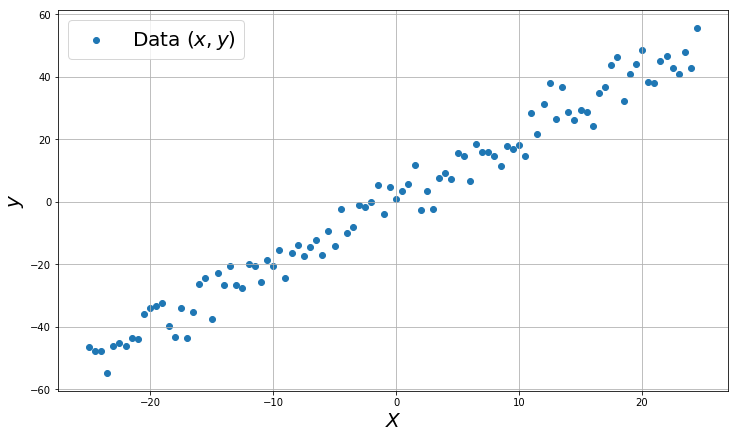

In [2]:
# example dataset for linear regression
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-25, 25, 0.5)
y = 2 * x + 1 + np.random.randn(100)*5

plt.figure(figsize=(12,7))
plt.scatter(x, y, label='Data $(x,y)$')
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

So the prediction will be a line in case of 2-D data like above. 

The predicted model will be line $ y = m x + c $ or in ML world popularly $ y = w x + b $.

$y = f(X) = wX+b$ will be the Linear regression model and the objective is to find the best $w$ and $b$ that will give the nearest values for each $(X,y=wX+b)$ pair in the dataset.

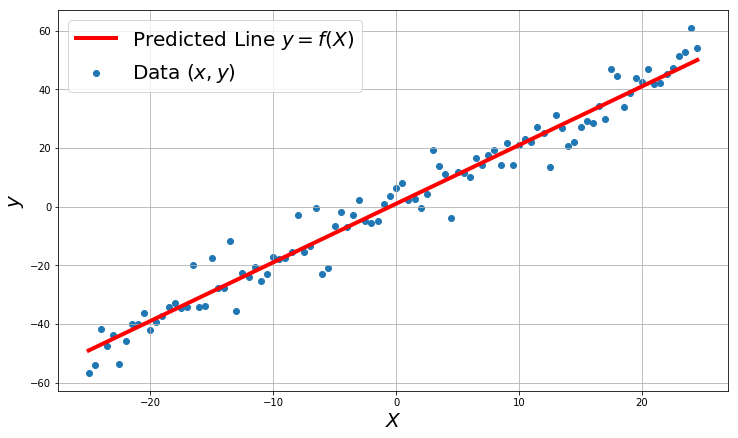

In [3]:
# example dataset for linear regression

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-25, 25, 0.5)
y = 2 * x + 1 + np.random.randn(100)*5

plt.figure(figsize=(12,7))
plt.scatter(x, y, label='Data $(x,y)$')
plt.plot(x, 2 * x + 1, label='Predicted Line $y = f(X)$', color='r',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

# What about Multi Dimensional Data?

In real world, the dataset is going to be multi dimensional, ie: the price of a House will not just depend on the area of the house, it may also depend on multiple factors like no of rooms, locality, distance from airport, etc.

|House Price($) y| Area(1000 sqft) x1| No of Rooms x2 | Distance form airport x3|
|-----------|-----|-----|-----|
|1034|2.4| 2 | 5.4 |
|1145|2.7| 3 | 3.1| 
|1252|3.04| 3 |4.21 |
|2231|4.67| 2| 2.3 |
|3423|5.3| 1| 12|
|...|...|...|...|

In this case the model will be $y = f(X) = w_1x_1 + w_2x_2+w_3x_3+...+w_nx_n + b$

This can also be represented in matrix form as $y = f(X) =  X.W + b$

$X = $\begin{bmatrix}
    x_{1}  & x_{2} & x_{3} & \dots & x_{n} \\
\end{bmatrix}

$W = $\begin{bmatrix}
    x_1  \\
    x_2  \\
    \vdots \\
    x_n
\end{bmatrix}

$b = [b]$




# How good is the Model?

Before learning how to find $W$ and $b$ of a model. Let us assume we have a calculated values for optimal $W$ and $b$, how do we know how good is this model $\hat{y} = f(X) = X.W + b$.

Notice it is not $y$, its $\hat{y}$.
Because W and b are not the exact values, they are calculated approximate values to get $f(X)$ close to $y$. So we represent the prediction as $\hat{y} = X.W + b$ and the true target as $y$.

Our goal is to make $\hat{y}$ as close as possible to $y$.

So we use a metric function call Mean Squared Error (MSE)

$MSE(y, \hat{y}) = \mathcal{L}(y , \hat{y}) = \dfrac{1}{n} \sum_{i=1}^{i=n}{(y_i - \hat{y}_i)^2}$


Why MSE? Why not just subtraction?
- model with 5 is better than -5 in sbtraction which actually is not both models are equally bad, but the predictions are in opposite direction.
- MSE takes care of -5 and 5 ; $(-5)^2$ = $5^2$ = 25.

In [4]:
import numpy as np

def MSE(y, y_hat):
  num_ex = len(y)
  mse_loss = np.sum((y - y_hat)**2)/num_ex
  return mse_loss

In [5]:
y = np.array([1.02, 2.3, 6.7, 3])
y_hat1 = np.array([10.43, 23.4, 12, 11])
y_hat2 = np.array([1, 1.9, 7, 3.1])

MSE(y,y), MSE(y, y_hat1), MSE(y, y_hat2)

(0.0, 156.46202499999998, 0.06509999999999996)

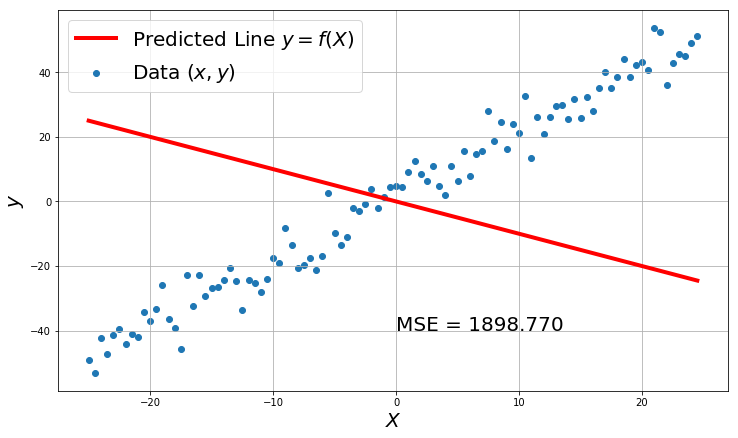

In [6]:
# example dataset for linear regression

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-25, 25, 0.5)
y = 2 * x + 1 + np.random.randn(100)*5

w = -1
b = 0
y_hat = w * x + b
mse_loss = MSE(y, y_hat)

plt.figure(figsize=(12,7))
plt.scatter(x, y, label='Data $(x,y)$')
plt.plot(x, y_hat, label='Predicted Line $y = f(X)$', color='r',linewidth=4.0)
plt.text(0,-40,'MSE = {:.3f}'.format(mse_loss), fontsize=20)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

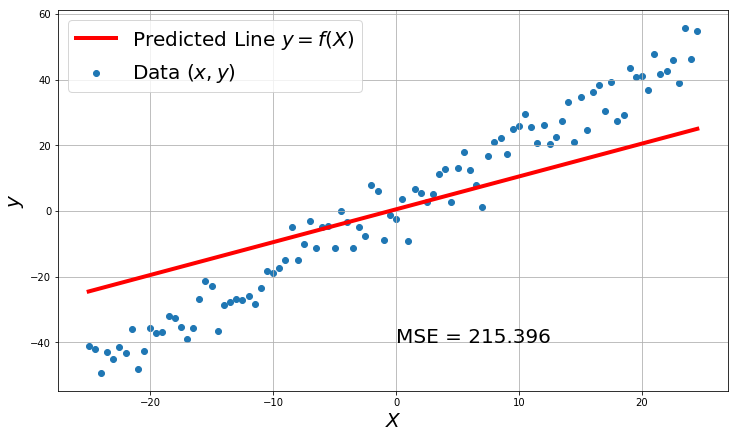

In [7]:
# example dataset for linear regression

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-25, 25, 0.5)
y = 2 * x + 1 + np.random.randn(100)*5

w = 1
b = 0.5
y_hat = w * x + b
mse_loss = MSE(y, y_hat)

plt.figure(figsize=(12,7))
plt.scatter(x, y, label='Data $(x,y)$')
plt.plot(x, y_hat, label='Predicted Line $y = f(X)$', color='r',linewidth=4.0)
plt.text(0,-40,'MSE = {:.3f}'.format(mse_loss), fontsize=20)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

You can evidently see that a better model have less MSE loss. So the object of finding $W$ and $b$ will be to reduce the MSE Loss. 

Its is not generally possible to get a MSE of 0 in real world data, as the real world data is always noisy and with outliers.

# How to find the Best Model? (W, b)

- randomly initialize W, b
- in loop for n steps/epochs{
    - find $\hat{y} = X.W + b$
    - find $MSE = \mathcal{L}(y, \hat{y})$
    - find $ \frac{\partial \mathcal{L}}{\partial w} $ and $ \frac{\partial \mathcal{L}}{\partial b} $
    - Update W and b with $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$ and $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$
}

This is called Gradient Descent.

Let's try it first and see why it works.

$\mathcal{L}= \dfrac{1}{n} \sum_{i=1}^{i=n}{(y_i - wx^i-b)^2} $

$ \frac{\partial \mathcal{L}}{\partial w}  =  \dfrac{1}{n} \sum_{i=1}^{i=n}{ 2 (y_i - wx^i-b) (-x^i)} = \dfrac{2}{n} \sum_{i=1}^{i=n}{ (wx^i+b - y_i) (x^i)}$

$ \frac{\partial \mathcal{L}}{\partial b}  =  \dfrac{1}{n} \sum_{i=1}^{i=n}{ 2 (y_i - wx^i-b) (-1)} = \dfrac{2}{n} \sum_{i=1}^{i=n}{ (wx^i+b - y_i)}$

Therefore

$w := w - \alpha  \dfrac{2}{n} (wX+b - y) (X)$

$b := b - \alpha \dfrac{2}{n}   \sum_{i=1}^{i=n}{ (wX+b - y_i)}$

In [12]:
def model_forward(x, w, b):
  y_hat = w * x + b
  return y_hat
  
  
def gradient_descent(w, b, X, y, a):
  w = w - a * 2 / X.shape[0] * np.dot(X.T, model_forward(X, w, b)- y)
  b = b - a * 2 / X.shape[0] * np.sum(model_forward(X, w, b)- y)
  return w, b

In [13]:
w, b = np.random.random(1), np.random.random(1)

X = np.arange(-25, 25, 0.5)
y = 2 * x + 1 + np.random.randn(100)*5

y_hat = model_forward(X, w, b)
MSE(y, y_hat) # of randomly initialized model

264.727616084892

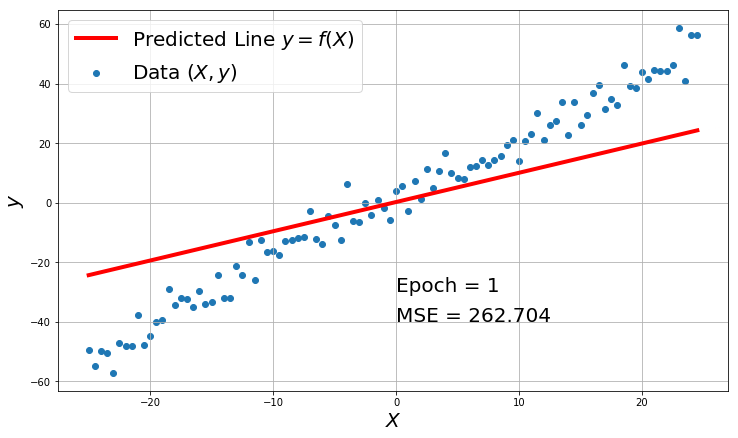

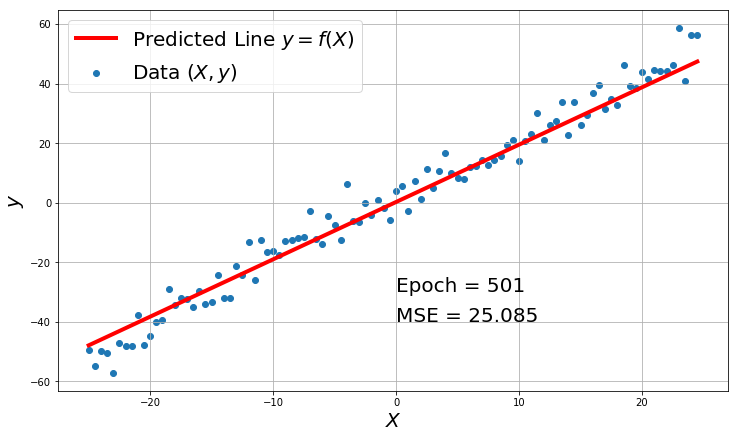

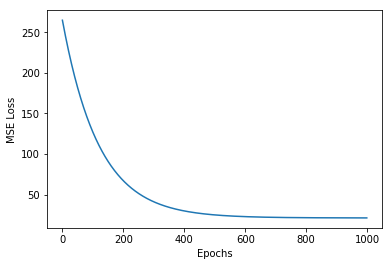

In [14]:
losses = []

alpha = 0.00001

for i in range(1000):
  y_hat = model_forward(X, w, b)
  mse = MSE(y_hat, y)
  losses.append(mse)
  w, b = gradient_descent(w, b, X, y, alpha)
  
  if i%500 == 0:
    y_hat = model_forward(X, w, b)
    mse = MSE(y_hat, y)
    
    plt.figure(figsize=(12,7))
    plt.scatter(X, y, label='Data $(X, y)$')
    plt.plot(X, y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
    plt.xlabel('$X$', fontsize=20)
    plt.ylabel('$y$', fontsize=20)
    plt.text(0,-30,'Epoch = {}'.format(i+1), fontsize=20)
    plt.text(0,-40,'MSE = {:.3f}'.format(mse), fontsize=20)
    plt.grid(True)
    plt.legend(fontsize=20)
    plt.show()

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

You can see how the loss decreases and the model prediction becomes better with the number of epochs.

Try to run the code with different alpha, different no of epochs and different initialization of w and b.

# Linear Regression in TensorFlow

W0826 22:55:12.266895 140546316871488 deprecation.py:506] From /home/shangeth/anaconda3/envs/dlenv/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


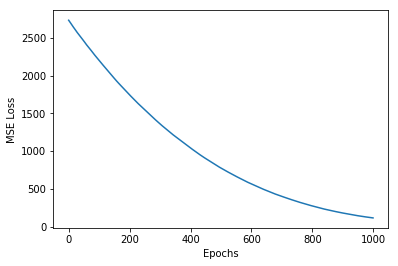

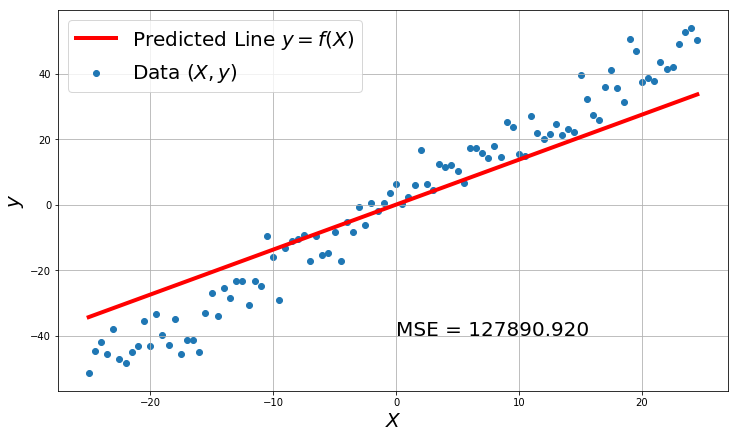

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

def MSE(y, y_hat):
  num_ex = len(y)
  mse_loss = np.sum((y - y_hat)**2)/num_ex
  return mse_loss


X = np.arange(-25, 25, 0.5).astype('float32')
y = (2 * X + 1 + np.random.randn(100)*5).astype('float32')

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='adam', loss='mean_squared_error')
tf_history = model.fit(X, y, epochs=1000, verbose=False)

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

y_hat = model.predict(X)
mse = MSE(y_hat, y)

plt.figure(figsize=(12,7))
plt.scatter(X, y, label='Data $(X, y)$')
plt.plot(X, y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,-40,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

Lets look into each line 
- ``` model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])```

        Sequential is like a container or wrapper which holds all the operations to be performed on your input.

- ``` model.compile(optimizer='adam', loss='mean_squared_error') ```

        Compile configures the training process. It defines the metrics, optimizers,..etc. You will understand more about this as we go on with more examples.

- ``` tf_history = model.fit(x, y, epochs=1000, verbose=False) ```

        model.fit actually trains the model for given number of epochs. Note: i've used Verbose=False(as the output will be long), set it to true to check the loss and metrics for each epoch.


Just 3-4 line of Tensorflow code can train a ml model, this is the advantage of using packages like Tensorflow/PyTorch. These packages are best optimized for speed and performance.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
tf.keras.Sequential? # if you are not sure of any library, its better to look into the docs.